<a href="https://colab.research.google.com/github/andres-gv/prueba_2020_07_15/blob/master/Ajuste_de_puntos_a_una_curva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ajuste de curvas
## Para qué se hacen ajustes de curvas?
  - Para "convertir" un conjunto de datos discretos en continuos
  - Para estimar interporlaciones o extrapolaciones que permitan hacer comparaciones o análisis.

### 1 Algunos Métodos:
 - lineal (tests, residuos etc) 
 - polinomiales (cubic, grado n, nspline, Chevysev, etc)
 - espectrales
 ...

### 2 A tener en cuenta:
 - Un Ajuste de curvas no es un modelo! es sólo un forma de aproximar valores a partir de un conjunto de datos conocido. 
 - Más importante que el método es tipo de problema en que se va a aplicar el método.
 - el objetivo es hacer interpolación o extrapolación? 
 - Restricciones: conservación (flujo)
 - Espectro
 - ventajas y limitaciones de cada método
 - Es importante probar varios métodos para elegir el 'mejor' en cada caso
 

## 1. Interpolación 1D

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [ ]:
f1 = interpolate.interp1d(x, y, kind = 'linear')
f2 = interpolate.interp1d(x, y, kind = 'cubic')

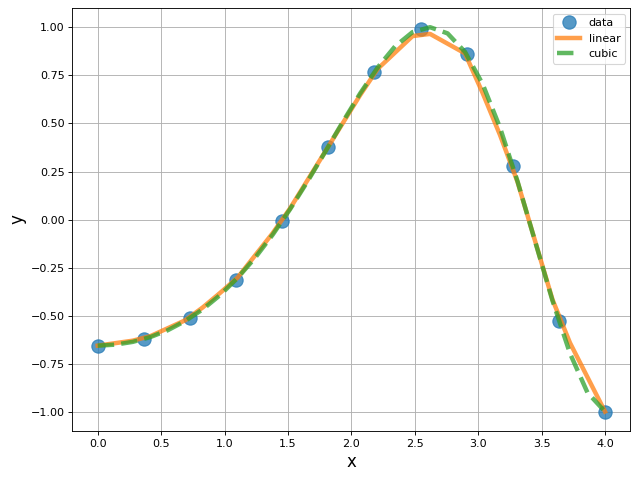

In [ ]:
xnew = np.linspace(0, 4,30)
plt.figure(figsize=(9, 7), dpi=80)
plt.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--',  alpha=.75, lw = 4.0, markersize=12 )

plt.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)

plt.grid(True)
plt.show()

## 2. Interpolación Bidimensional


In [ ]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [ ]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [ ]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

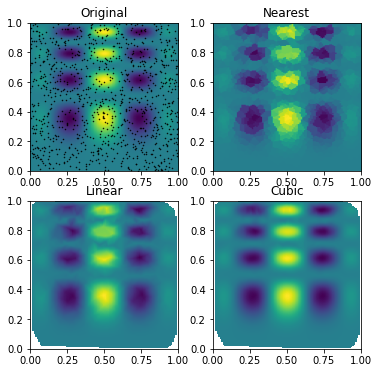

In [ ]:
import matplotlib.pyplot as plt
#plt.subplots(figsize=(9,9)
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)
print (x,y)
plt.plot(x, y,'o')
plt.show()